In [60]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



In [2]:
# reading csv files
data = pd.read_csv('train.csv')
data = data.drop(columns='station_id')

In [3]:
# nan value percentage for each column (feature)
coverage = data.isna().sum() / len(data)

In [4]:
# excluding features with at least 50% nan rate
data = data[coverage[coverage < 0.5].index]

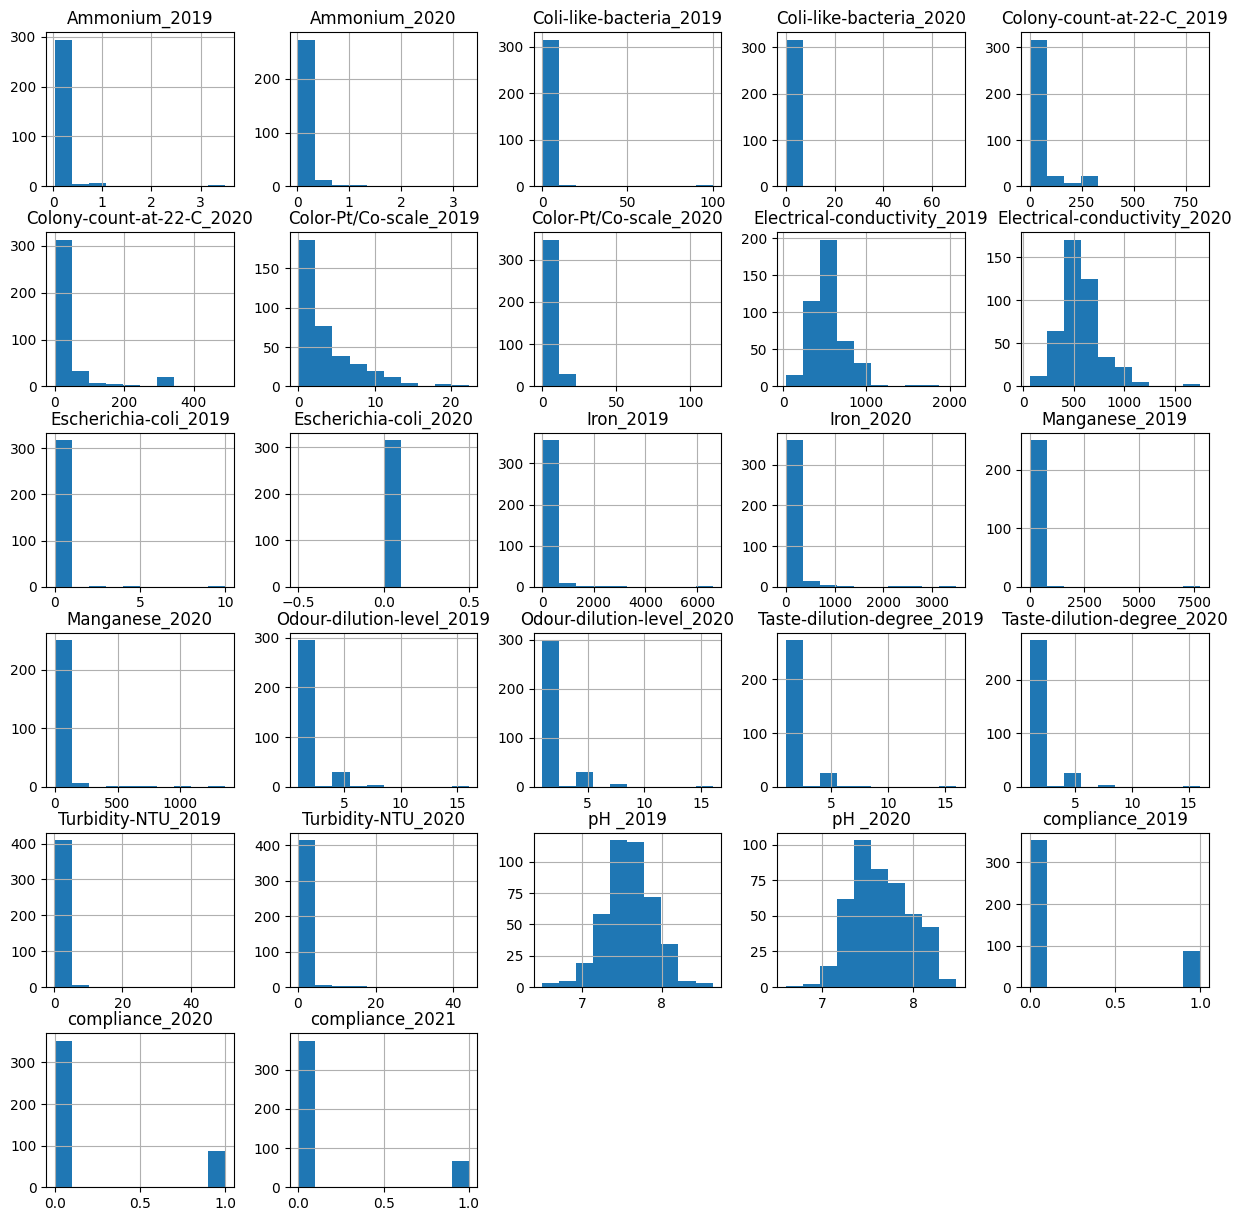

In [5]:
# Checking the distribution of the values for each feature
data.hist(figsize=(15, 15));

In [8]:
data_X = data.drop(columns=['compliance_2021'])
data_y = data['compliance_2021']

In [9]:
non_binary_columns = ['Ammonium_2019', 'Ammonium_2020', 'Coli-like-bacteria_2019',
       'Coli-like-bacteria_2020', 'Colony-count-at-22-C_2019',
       'Colony-count-at-22-C_2020', 'Color-Pt/Co-scale_2019',
       'Color-Pt/Co-scale_2020', 'Electrical-conductivity_2019',
       'Electrical-conductivity_2020', 'Escherichia-coli_2019',
       'Escherichia-coli_2020', 'Iron_2019', 'Iron_2020', 'Manganese_2019',
       'Manganese_2020', 'Odour-dilution-level_2019',
       'Odour-dilution-level_2020', 'Taste-dilution-degree_2019',
       'Taste-dilution-degree_2020', 'Turbidity-NTU_2019',
       'Turbidity-NTU_2020', 'pH _2019', 'pH _2020']

### Split the data

In [10]:
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, test_size=0.2, random_state=42, stratify=data_y)

## Modelling

### Linear regression

### Scaling

In [11]:
ct = ColumnTransformer([("robust_scaler", RobustScaler(), list(range(24)))], remainder='passthrough')

#### Filling nan values with median for each column since there are outliers which affects mean of the dataset

In [50]:
pipe = Pipeline([("simple_imp", SimpleImputer(strategy='median')), 
                 ("robust_scaler", ct), 
                 ("classifier", RandomForestClassifier())])

In [32]:
params = [{'classifier': [LogisticRegression(max_iter=1000)],
           'classifier__C':[.01,.05,.1,.5,1,5,10],
           'classifier__penalty':['l2', 'none'], 
           'classifier__solver': ['newton-cg', 'lbfgs', 'sag']
          }, 
          {'classifier': [LogisticRegression(max_iter=1000)],
           'classifier__C':[.01,.05,.1,.5,1,5,10], 
           'classifier__penalty':['l1','l2'], 
           'classifier__solver': ['liblinear']
          }, 
          {'classifier': [LogisticRegression(max_iter=1000)],
           'classifier__C':[.01,.05,.1,.5,1,5,10], 
           'classifier__penalty':['l1','l2', 'elasticnet', 'none'], 
           'classifier__solver': ['saga'], 
           'classifier__l1_ratio': [.0, .1, .25, .5, .75, 1]}, 
          {'classifier' : [RandomForestClassifier()],
           'classifier__criterion': ['gini', 'log_loss'], 
           'classifier__max_depth': list(range(2, 10, 2)),
           'classifier__n_estimators' : list(range(5,25,5)),
           'classifier__max_features' : list(range(6,26,2))}]

In [33]:
clf = GridSearchCV(estimator=pipe, param_grid=params, scoring='f1', n_jobs=-1, cv=5, verbose=3)

In [34]:
clf.fit(train_X, train_y)

Fitting 5 folds for each of 544 candidates, totalling 2720 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simple_imp',
                                        SimpleImputer(strategy='median')),
                                       ('robust_scaler',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('robust_scaler',
                                                                         RobustScaler(),
                                                                         [0, 1,
                                                                          2, 3,
                                                                          4, 5,
                                                                          6, 7,
                                                                          8, 9,
                                                                          10,
                                                                          11,
                                                                          12,
                                                                          13,
                                                                          14,
                                                                          15,
                                                                          16,
                                                                          17,
                                                                          18,
                                                                          19,
                                                                          20,
                                                                          21,
                                                                          22,
                                                                          23])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid=[{'classifier...
                          'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                  'none'],
                          'classifier__solver': ['saga']},
                         {'classifier': [RandomForestClassifier(criterion='log_loss',
                                                                max_depth=8,
                                                                max_features=24,
                                                                n_estimators=5)],
                          'classifier__criterion': ['gini', 'log_loss'],
                          'classifier__max_depth': [2, 4, 6, 8],
                          'classifier__max_features': [6, 8, 10, 12, 14, 16, 18,
                                                       20, 22, 24],
                          'classifier__n_estimators': [5, 10, 15, 20]}],
             scoring='f1', verbose=3)

In [51]:
pipe.fit(train_X, train_y)

Pipeline(steps=[('simple_imp', SimpleImputer(strategy='median')),
                ('robust_scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust_scaler',
                                                  RobustScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22,
                                                   23])])),
                ('classifier',
                 RandomForestClassifier(criterion='log_loss', max_depth=8,
                                        max_features=24, n_estimators=5))])

In [55]:
importances = pipe['classifier'].feature_importances_
std = np.std([tree.feature_importances_ for tree in pipe['classifier'].estimators_], axis=0)

In [66]:
train_X.columns[importances > 0.03]

Index(['Ammonium_2020', 'Coli-like-bacteria_2020', 'Colony-count-at-22-C_2019',
       'Colony-count-at-22-C_2020', 'Color-Pt/Co-scale_2020',
       'Electrical-conductivity_2019', 'Electrical-conductivity_2020',
       'Iron_2019', 'Iron_2020', 'Manganese_2019', 'Manganese_2020',
       'Turbidity-NTU_2019', 'pH _2019'],
      dtype='object')

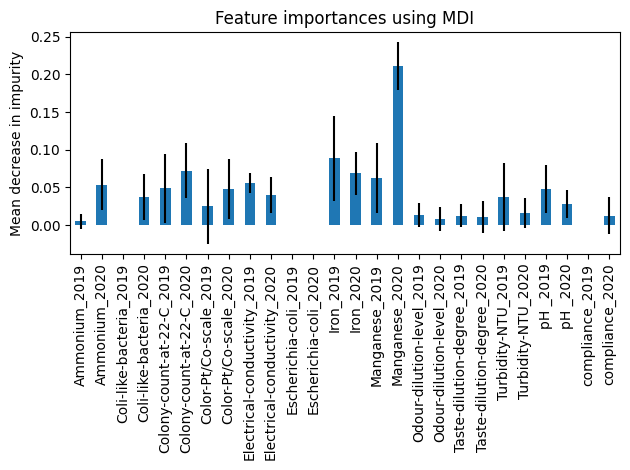

In [61]:
forest_importances = pd.Series(importances, index=train_X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


### Train confusion matrix

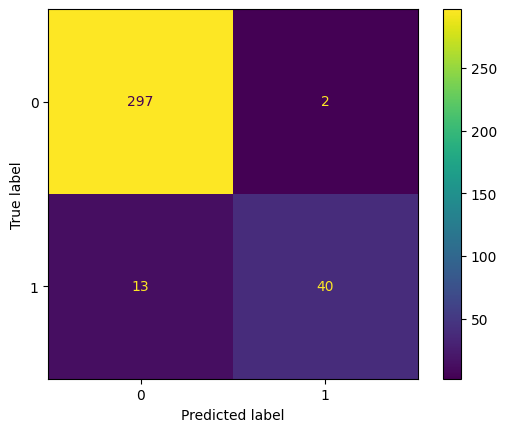

In [35]:
train_predictions = clf.predict(train_X)
cm = confusion_matrix(train_y, train_predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

### Test confusion matrix

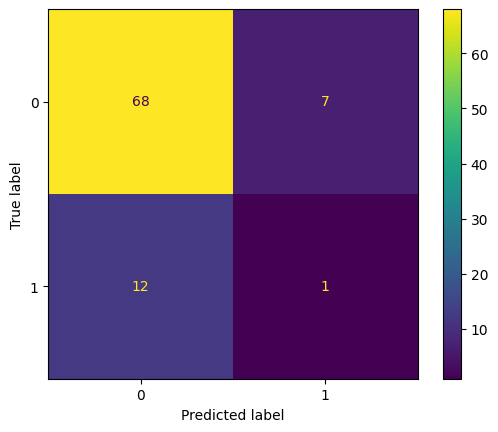

In [36]:
test_predictions = clf.predict(test_X)
cm = confusion_matrix(test_y, test_predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

In [37]:
clf.best_params_

{'classifier': RandomForestClassifier(criterion='log_loss', max_depth=8, max_features=24,
                        n_estimators=5),
 'classifier__criterion': 'log_loss',
 'classifier__max_depth': 8,
 'classifier__max_features': 24,
 'classifier__n_estimators': 5}

### Logistic regression with selected features

In [68]:
important_features = ['Ammonium_2020', 'Coli-like-bacteria_2020', 'Colony-count-at-22-C_2019',
       'Colony-count-at-22-C_2020', 'Color-Pt/Co-scale_2020',
       'Electrical-conductivity_2019', 'Electrical-conductivity_2020',
       'Iron_2019', 'Iron_2020', 'Manganese_2019', 'Manganese_2020',
       'Turbidity-NTU_2019', 'pH _2019']

In [70]:
pipe = Pipeline([("simple_imp", SimpleImputer(strategy='median')), 
                 ("robust_scaler", RobustScaler()), 
                 ("classifier", RandomForestClassifier())])
params = [{'classifier': [LogisticRegression(max_iter=1000)],
           'classifier__C':[.01,.05,.1,.5,1,5,10],
           'classifier__penalty':['l2', 'none'], 
           'classifier__solver': ['newton-cg', 'lbfgs', 'sag']
          }, 
          {'classifier': [LogisticRegression(max_iter=1000)],
           'classifier__C':[.01,.05,.1,.5,1,5,10], 
           'classifier__penalty':['l1','l2'], 
           'classifier__solver': ['liblinear']
          }, 
          {'classifier': [LogisticRegression(max_iter=1000)],
           'classifier__C':[.01,.05,.1,.5,1,5,10], 
           'classifier__penalty':['l1','l2', 'elasticnet', 'none'], 
           'classifier__solver': ['saga'], 
           'classifier__l1_ratio': [.0, .1, .25, .5, .75, 1]}, 
          {'classifier' : [RandomForestClassifier()],
           'classifier__criterion': ['gini', 'log_loss'], 
           'classifier__max_depth': list(range(2, 10, 2)),
           'classifier__n_estimators' : list(range(5,25,5)),
           'classifier__max_features' : list(range(6,26,2))}]
clf = GridSearchCV(estimator=pipe, param_grid=params, scoring='f1', n_jobs=-1, cv=5, verbose=3)

In [71]:
clf.fit(train_X[important_features], train_y)

Fitting 5 folds for each of 544 candidates, totalling 2720 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simple_imp',
                                        SimpleImputer(strategy='median')),
                                       ('robust_scaler', RobustScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression(max_iter=1000)],
                          'classifier__C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                          'classifier__penalty': ['l2', 'none'],
                          'classifier__solver': ['newton-cg...
                          'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                  'none'],
                          'classifier__solver': ['saga']},
                         {'classifier': [RandomForestClassifier(criterion='log_loss',
                                                                max_depth=8,
                                                                max_features=18,
                                                                n_estimators=5)],
                          'classifier__criterion': ['gini', 'log_loss'],
                          'classifier__max_depth': [2, 4, 6, 8],
                          'classifier__max_features': [6, 8, 10, 12, 14, 16, 18,
                                                       20, 22, 24],
                          'classifier__n_estimators': [5, 10, 15, 20]}],
             scoring='f1', verbose=3)

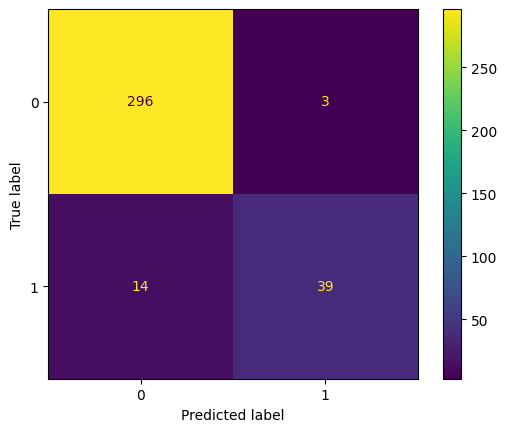

In [72]:
train_predictions = clf.predict(train_X[important_features])
cm = confusion_matrix(train_y, train_predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

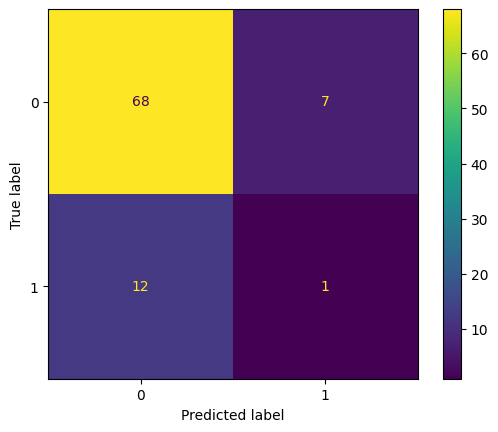

In [73]:
test_predictions = clf.predict(test_X[important_features])
cm = confusion_matrix(test_y, test_predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

### XGboost

In [79]:
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
clf = GridSearchCV(estimator=XGBClassifier(tree_method='gpu_hist'), param_grid=param_grid, scoring='f1', n_jobs=-1, cv=5, verbose=3)
clf.fit(train_X, train_y)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='f1', verbose=3)

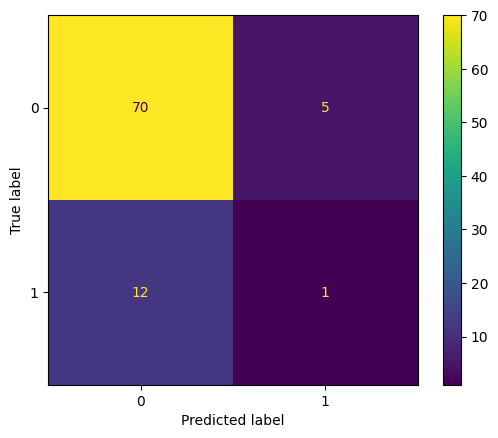

In [81]:
test_predictions = clf.predict(test_X)
cm = confusion_matrix(test_y, test_predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

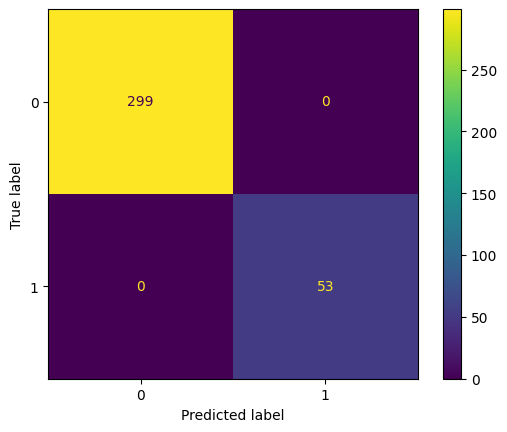

In [80]:
train_predictions = clf.predict(train_X)
cm = confusion_matrix(train_y, train_predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

In [82]:
xgboost = XGBClassifier(tree_method='gpu_hist', **clf.best_params_)
xgboost.fit(train_X, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.5, gpu_id=0,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [83]:
selected_columns = train_X.columns[xgboost.feature_importances_ > 0.035]
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
clf = GridSearchCV(estimator=XGBClassifier(tree_method='gpu_hist'), param_grid=param_grid, scoring='f1', n_jobs=-1, cv=5, verbose=3)
clf.fit(train_X[selected_columns], train_y)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='f1', verbose=3)

In [87]:
clf.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.5,
 'max_depth': 3,
 'min_child_weight': 5,
 'subsample': 0.6}

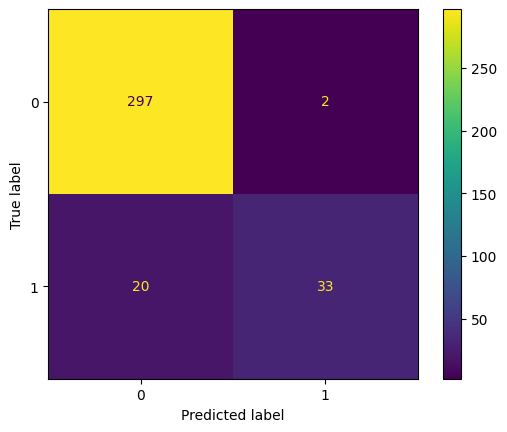

In [88]:
train_predictions = clf.predict(train_X[selected_columns])
cm = confusion_matrix(train_y, train_predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

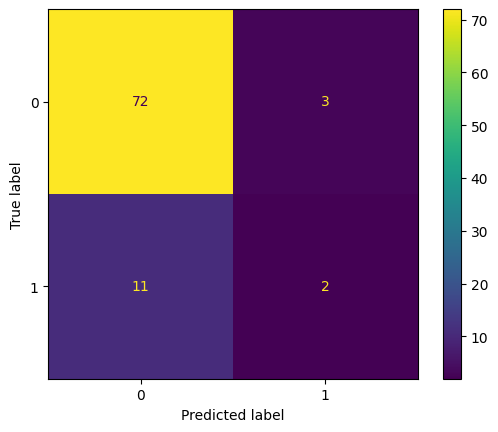

In [89]:
test_predictions = clf.predict(test_X[selected_columns])
cm = confusion_matrix(test_y, test_predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

In [74]:
test_data = pd.read_csv('test.csv')

In [76]:
test_predictions = clf.predict(test_data[important_features])

In [77]:
submission = pd.DataFrame(test_data.station_id)
submission['compliance_2021'] = test_predictions

In [78]:
submission.to_csv('submission_random_forest_important_features.csv', index=False)